In [1]:
import tensorflow as tf
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Train image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


## Model Building

In [4]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [5]:
model=Sequential()

In [6]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\Legion\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [8]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Dropout(0.25))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units=1500,activation='relu'))

In [14]:
model.add(Dropout(0.4 ))

In [15]:
model.add(Dense(units=38,activation='softmax'))

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [18]:
train_m=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1972s 896ms/step - accuracy: 0.3938 - loss: 2.1471 - val_accuracy: 0.8479 - val_loss: 0.4836
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2018s 919ms/step - accuracy: 0.8287 - loss: 0.5405 - val_accuracy: 0.8907 - val_loss: 0.3406
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2089s 951ms/step - accuracy: 0.9012 - loss: 0.3073 - val_accuracy: 0.9339 - val_loss: 0.2003
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2119s 964ms/step - accuracy: 0.9333 - loss: 0.2090 - val_accuracy: 0.9423 - val_loss: 0.1804
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2061s 938ms/step - accuracy: 0.9489 - loss: 0.1553 - val_accuracy: 0.9435 - val_loss: 0.1696
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1831s 833ms/step - accuracy: 0.9616 - loss: 0.1223 - val_accuracy: 0.9630 - val_loss: 0.1192
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1819s 828ms/step - accuracy: 0.9690 - loss: 0.0936 - val_accuracy: 0.9637 - val_loss: 0.1138
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1827s 831ms/s

## Evaluation

In [19]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 610s 277ms/step - accuracy: 0.9804 - loss: 0.0606


In [20]:
print(train_loss,train_acc)

0.056793488562107086 0.981677234172821


In [21]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 138s 250ms/step - accuracy: 0.9534 - loss: 0.1536


In [22]:
print(val_loss,val_acc)

0.15923555195331573 0.9521966576576233


## Model Saving

In [23]:
model.save("trained_model.h5")

In [24]:
model.save("trained_model.keras")

In [25]:
train_m.history

{'accuracy': [0.5948644876480103,
  0.8535884618759155,
  0.9114019274711609,
  0.9387580752372742,
  0.9524148106575012,
  0.9627569317817688,
  0.9704104065895081,
  0.9747350215911865,
  0.9791308045387268,
  0.9817483425140381],
 'loss': [1.373091220855713,
  0.45829108357429504,
  0.2753937840461731,
  0.19126074016094208,
  0.14561524987220764,
  0.11493954807519913,
  0.08975820988416672,
  0.0764370858669281,
  0.0652989000082016,
  0.056249380111694336],
 'val_accuracy': [0.8479399085044861,
  0.8907352685928345,
  0.9339289665222168,
  0.9422945380210876,
  0.9435465335845947,
  0.9629524350166321,
  0.9636922478675842,
  0.9566924571990967,
  0.9647166132926941,
  0.9521966576576233],
 'val_loss': [0.4835786521434784,
  0.3405928313732147,
  0.20033112168312073,
  0.1803763508796692,
  0.16956529021263123,
  0.11923059821128845,
  0.11382210999727249,
  0.14995542168617249,
  0.11229491978883743,
  0.15923552215099335]}

In [26]:
import json
with open("train_m.json","w") as f:
    json.dump(train_m.history,f)

## Visualization

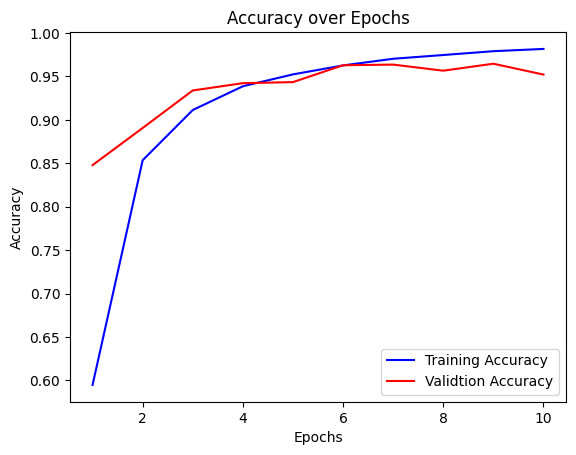

In [31]:
import matplotlib.pyplot as plt

epochs=[i for i in range(1,11)]
plt.plot(epochs,train_m.history['accuracy'],color='blue',label="Training Accuracy")
plt.plot(epochs,train_m.history['val_accuracy'],color='red',label="Validtion Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

In [32]:
class_names=validation_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [34]:
y_pred=model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 125s 228ms/step


array([[9.99462426e-01, 2.39375629e-04, 3.35571428e-08, ...,
        3.33104768e-12, 1.51484346e-11, 7.78080898e-12],
       [9.71336782e-01, 6.15088939e-05, 3.13883675e-06, ...,
        1.84418028e-08, 1.79993398e-09, 2.28970509e-09],
       [1.00000000e+00, 1.50466375e-11, 2.65145924e-13, ...,
        6.93375990e-21, 4.61323657e-17, 1.50940014e-16],
       ...,
       [1.49231472e-08, 1.06944766e-10, 1.81638882e-08, ...,
        1.02907386e-07, 3.93809563e-09, 9.36108649e-01],
       [7.15865980e-08, 1.07249050e-10, 2.24709709e-08, ...,
        6.97978422e-08, 2.43593590e-09, 9.99901175e-01],
       [2.50134236e-11, 4.62379831e-12, 2.30645971e-11, ...,
        8.94507721e-13, 2.61448242e-12, 9.99875307e-01]], dtype=float32)

In [36]:
pred_categories=tf.argmax(y_pred,axis=1)
pred_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_true,pred_categories,target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.89      0.93       504
                                 Apple___Black_rot       0.95      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.94      0.92      0.93       502
                               Blueberry___healthy       0.99      0.95      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.89      0.91       410
                       Corn_(maize)___Common_rust_       0.97      1.00      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.96      0.

In [42]:
cm=confusion_matrix(y_true,pred_categories)

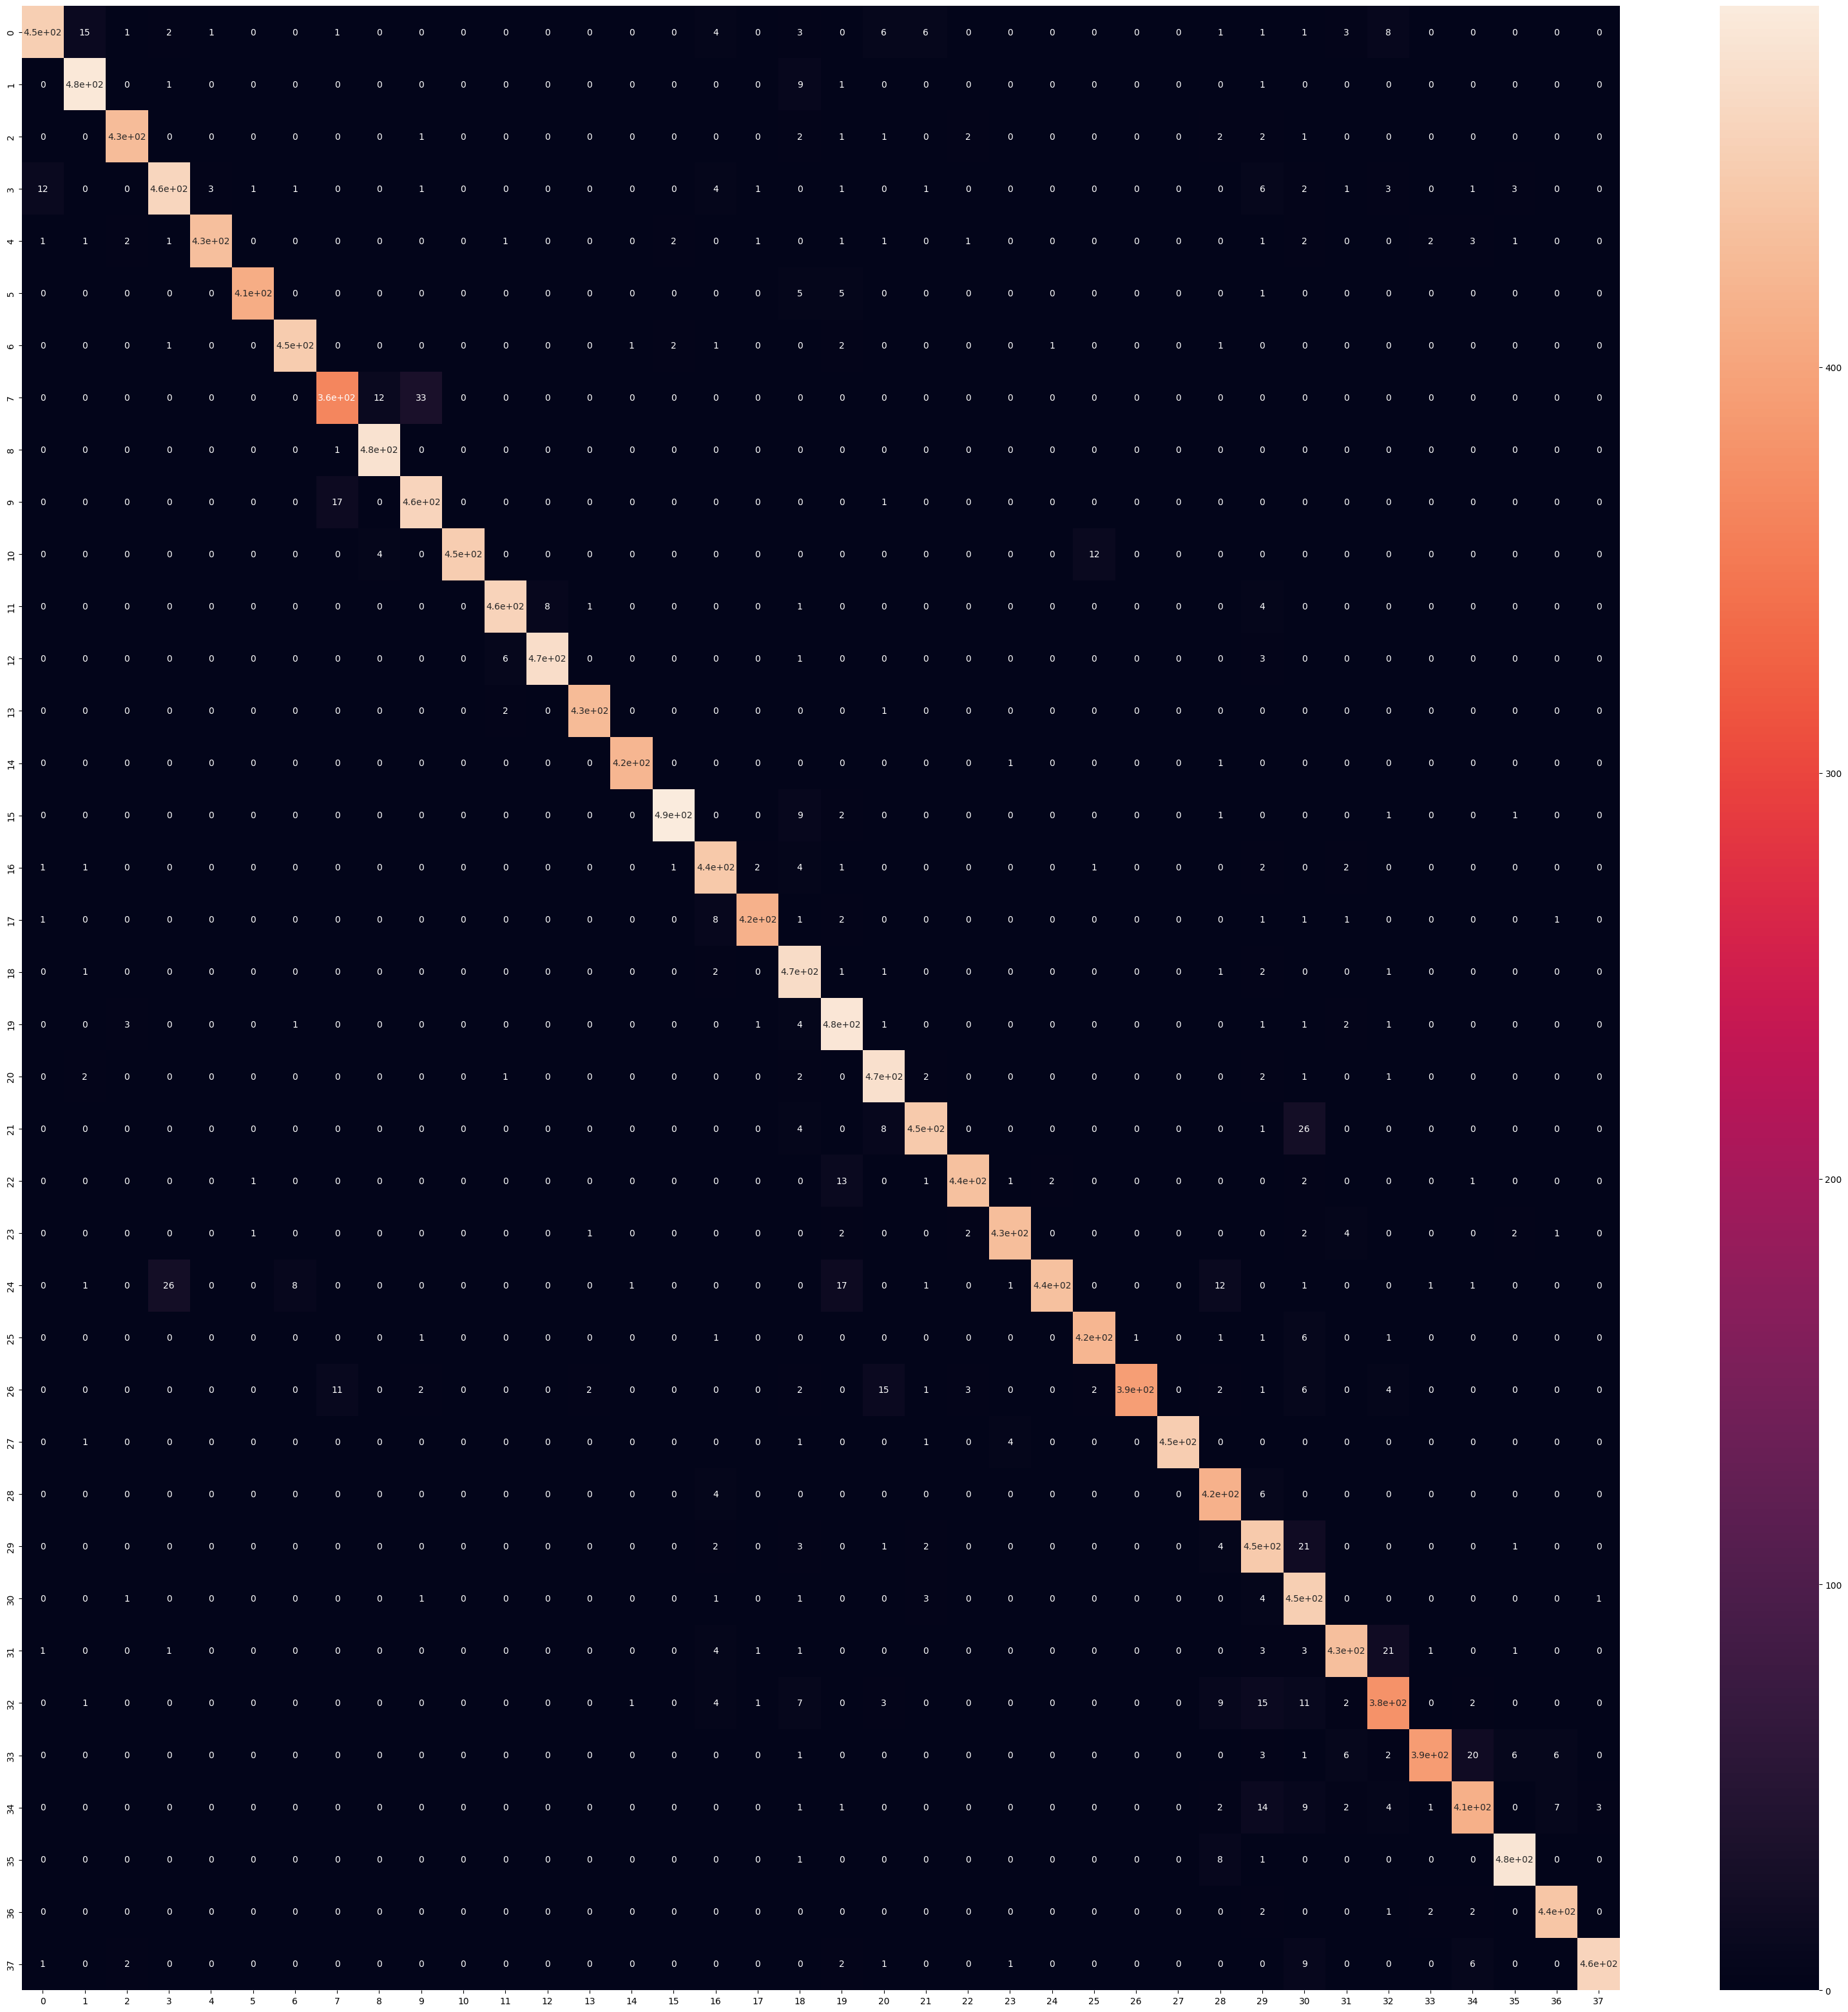

In [46]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True)
plt.show()